## 네이버 지식IN 을 통한 검색을 워드클라우드

- 물론 네이버 개발자 API를 이용하면 훨씬 빠르게 데이타를 가져올 수 있다

- 간단하게 주소창의 주소로 크롤링한다.

- 크롬 개발자모드에서 검색부분을 가져온다 ( 각 dl 태그 )


In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

%matplotlib inline

# 간단한 한글 폰드 등록
from matplotlib import rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')


In [2]:
# 주소를 약간 수정함
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&kin_start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('비오는 더운 날 음식')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [3]:
# 주소를 약간 수정함
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&kin_start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여자친구 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [3]:
# 테스트로 첫번째 페이지의 텍스트만 가져온다
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[1:5]

[' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  세상에서 가장 맛있는 음식   2020.07.12.   세상에서 가장 맛있는 음식은 뭔가요?   답변 그런데, 좋아 하는 음식이 기분따라 바뀌거든요. 비오는 날은 부침개, 추운날은 뜨끈한 만두국, 더운날에 차가운 콩국수, 스트레스 받을때는 얼큰한 떡볶이, 야외에서는...    닉네임지팡이   ',
 '  질문  비 오는 날   2019.08.06.   아직 고등학생인데도 허리랑 무릎이 안 좋아서 평소에 좀 아픈데 비 오는 날에는 더 심해요. 힘인 안 들어가지는 느낌에 아릿아릿하고 조금 찌르는 듯한 느낌인데 왜...   답변 비오는 날은 저기압입니다. - 외부 환경에 맞게 인체내... 것, 더운 성질을 가진 밀가루 등으로 몸을 뎁혀주기... 좋고, 음식에 곁들여 드셔도 좋겠습니다. 감사합니다....    닉네임채기헌   ',
 '  질문  싱가폴여행준비 문의   2010.07.04.   모두 비오는 날씨인데 지금 우기인가요ㅠㅠ?? 10일 출국입니다.. 비가와도 여행하기 괜찮은가요?? 또 더운날씨인... 음식 종류가 굉장히 많아서 많이 즐기고 싶은데, 향이...   답변 모두 비오는 날씨인데 지금 우기인가요ㅠㅠ?? 10일 출국입니다.. 비가와도 여행하기 괜찮은가요?? 또 더운날씨... 음식 종류가 굉장히 많아서 많이 즐기고 싶은데, 향이...    닉네임해피엔드   ']

In [5]:
#1000 만개 정도의 검색 결과를 읽어온다.
# 첫번째 페이지 start=1, 두번째 페이지인 경우 start=11인거 확인한다.
# 웹 페이지 직접 접근 할 땐느 간단이 time.sleep()으로 요청을 간격적으로 한다.
# 시간이 10분 정도 소요되기에 상태바를 보여준다. ( tqdm.tqdm_notebook 이용)

from urllib.request import urlopen
from tqdm import tqdm_notebook

present_candi_text = []


for n in tqdm_notebook(range(1,1000,10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('비오는 더운 날 음식')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(5)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


In [6]:
len(present_candi_text)

628

In [7]:
#만개의 글을 하나의 변수에 저장

import nltk
from konlpy.tag import Okt

okt= Okt()

present_text =''
for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [9]:
# 형태소 분석
tokens_ko = okt.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '세상',
 '에서',
 '가장',
 '맛있는',
 '음식',
 '2020.07',
 '.',
 '12',
 '.',
 '세상',
 '에서',
 '가장',
 '맛있는',
 '음식',
 '은',
 '뭔가',
 '요',
 '?',
 '답변',
 '그런데',
 ',',
 '좋아',
 '하는',
 '음식',
 '이',
 '기분',
 '따라',
 '바뀌거든요',
 '.',
 '비오는',
 '날',
 '은',
 '부침개',
 ',',
 '추운',
 '날',
 '은',
 '뜨끈한',
 '만두국',
 ',',
 '더운',
 '날',
 '에',
 '차가운',
 '콩국수',
 ',',
 '스트레스',
 '받을',
 '때',
 '는',
 '얼큰한',
 '떡볶이',
 ',',
 '야외',
 '에서는',
 '...',
 '닉네임',
 '지팡이',
 '질문',
 '비',
 '오는',
 '날',
 '2019.08',
 '.',
 '06',
 '.',
 '아직',
 '고등학생',
 '인데',
 '도',
 '허리',
 '랑',
 '무릎',
 '이',
 '안',
 '좋아서',
 '평소',
 '에',
 '좀',
 '아픈데',
 '비',
 '오는'

In [10]:
ko = nltk.Text(tokens_ko,name='비오는 더운 날 음식')
print(len(ko.tokens))
print(len(set(ko.tokens))) #중복제거

42427
4756


In [11]:
ko.vocab().most_common()

[('.', 1778),
 ('...', 1354),
 ('이', 1052),
 ('에', 620),
 ('을', 588),
 ('단어', 539),
 (',', 508),
 ('가', 506),
 ('날', 490),
 ('의', 470),
 ('답변', 465),
 ('질문', 455),
 ('를', 405),
 ('검색', 402),
 ('음식', 372),
 ('더운', 360),
 ('닉네임', 354),
 ('비오는', 346),
 ('하는', 334),
 ('는', 329),
 ('입력', 300),
 ('것', 298),
 ('과', 288),
 ('때', 264),
 ('은', 256),
 ('로', 255),
 ('좀', 248),
 ('****', 244),
 ('한', 239),
 ('도', 218),
 ('속담', 213),
 ('포함', 204),
 ('[', 200),
 (']', 194),
 ('2', 191),
 ('날씨', 184),
 ('된', 182),
 ('기', 172),
 ('3', 172),
 ('농가월령가', 172),
 ('못', 163),
 ('..', 155),
 ('?', 152),
 ('개', 144),
 ('합니다', 137),
 ('에는', 135),
 ('소리', 132),
 ('에서', 130),
 ('할', 127),
 ('요', 122),
 (')', 118),
 ('(', 118),
 ('내공', 117),
 ('해서', 115),
 ('사용', 112),
 ('제', 112),
 ('이상', 111),
 ('/', 110),
 ('맛', 110),
 ('여러', 109),
 ('말고', 109),
 ('기본', 107),
 ('하나', 105),
 ('알려주세요', 105),
 ('산', 104),
 ('문장', 103),
 ('하세요', 103),
 ('본', 102),
 ('1', 102),
 ('반드시', 101),
 ('제외', 101),
 ('심으리라', 101),
 ('솔가지', 1

In [12]:
# 의미없는 단어들을 수동으로 제거해준다.
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                          if each_word not in stop_words]

ko = nltk.Text(tokens_ko,name='여자친구 선물')
ko.vocab().most_common()

[('날', 490),
 ('검색', 402),
 ('음식', 372),
 ('더운', 360),
 ('닉네임', 354),
 ('비오는', 346),
 ('입력', 300),
 ('****', 244),
 ('속담', 213),
 ('포함', 204),
 ('[', 200),
 (']', 194),
 ('날씨', 184),
 ('된', 182),
 ('기', 172),
 ('3', 172),
 ('농가월령가', 172),
 ('개', 144),
 ('합니다', 137),
 ('에는', 135),
 ('소리', 132),
 ('에서', 130),
 (')', 118),
 ('(', 118),
 ('내공', 117),
 ('해서', 115),
 ('사용', 112),
 ('/', 110),
 ('맛', 110),
 ('여러', 109),
 ('말고', 109),
 ('알려주세요', 105),
 ('산', 104),
 ('문장', 103),
 ('하세요', 103),
 ('본', 102),
 ('반드시', 101),
 ('제외', 101),
 ('심으리라', 101),
 ('솔가지', 101),
 ('울타리', 101),
 ('문서', 100),
 ('상세', 100),
 ('정확히', 100),
 ('일치', 100),
 ('("', 100),
 ('")', 100),
 ('(+)', 100),
 ('(-)', 100),
 ('결과', 100),
 ('범위', 100),
 ('줄이고자', 100),
 ('하실', 100),
 ('쉼표', 100),
 ('(,)', 100),
 ('구분', 100),
 ('찍어다가', 100),
 ('보리', 100),
 ('보세', 100),
 ('베어', 98),
 ('끝끝', 97),
 ('익어도', 97),
 ('밤', 95),
 ('밀', 95),
 ('심어', 95),
 ('비', 94),
 ('갈이', 93),
 ('정도', 91),
 (':', 90),
 ('와', 89),
 ('하려니와', 88),
 ('나네', 

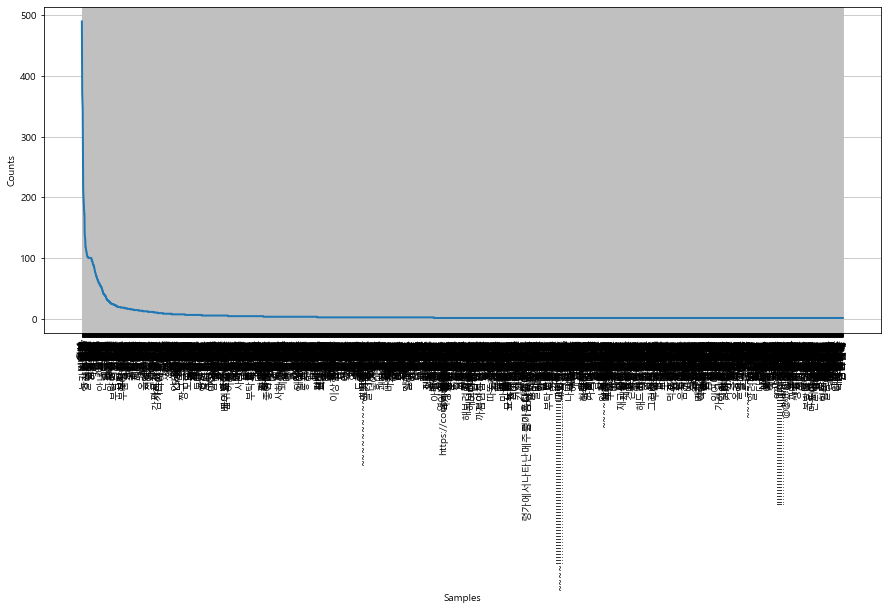

In [13]:
plt.figure(figsize=(15,6))
ko.plot()

In [13]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

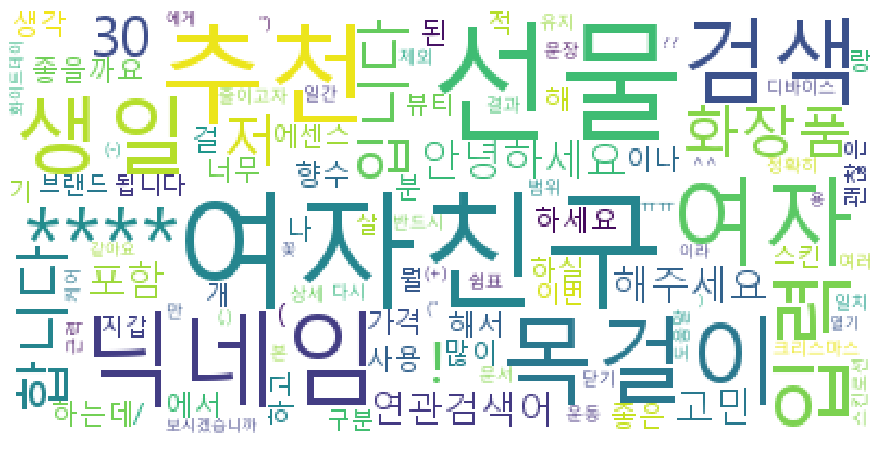

In [14]:
""" 워드 크라우드 그리기 """

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path = 'c:Windows/Fonts/malgun.ttf',relative_scaling=0.2, background_color ='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')


(-0.5, 766.5, 719.5, -0.5)

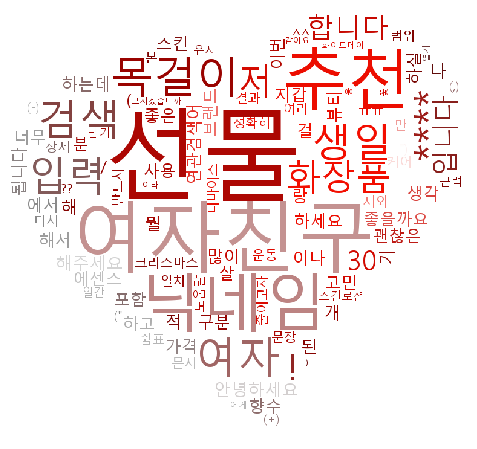

In [15]:
""" 이미지로 마스킹하여 워드 크라우드 그리기 """

from wordcloud import ImageColorGenerator

mask = np.array(Image.open('./img/heart_image.jpg'))
image_colors=ImageColorGenerator(mask)
data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path = 'c:Windows/Fonts/malgun.ttf',relative_scaling=0.2,mask=mask, background_color ='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis('off')